In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [16]:
data=pd.read_csv('HR_Analytics.csv')
data

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,80,1,10,3,3,10,7,1,7,No
2,3,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,4,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,80,0,8,3,3,8,7,3,0,No
4,5,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,80,1,6,3,3,2,2,2,2,No
5,6,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,80,0,8,2,2,7,7,3,6,No
6,7,59,Travel_Rarely,1324,Research & Development,3,3,Medical,10,3,...,80,3,12,3,2,1,0,0,0,No
7,8,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,11,4,...,80,1,1,2,3,1,0,0,0,No
8,9,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,12,4,...,80,0,10,2,3,9,7,1,8,No
9,10,36,Travel_Rarely,1299,Research & Development,27,3,Medical,13,3,...,80,2,17,3,2,7,7,7,7,No


In [17]:
data.head(5)

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,80,1,10,3,3,10,7,1,7,No
2,3,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,4,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,80,0,8,3,3,8,7,3,0,No
4,5,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,80,1,6,3,3,2,2,2,2,No


In [18]:
data.tail(10)

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1460,1461,29,Travel_Rarely,468,Research & Development,28,4,Medical,2054,4,...,80,0,5,3,1,5,4,0,4,No
1461,1462,50,Travel_Rarely,410,Sales,28,3,Marketing,2055,4,...,80,1,20,3,3,3,2,2,0,Yes
1462,1463,39,Travel_Rarely,722,Sales,24,1,Marketing,2056,2,...,80,1,21,2,2,20,9,9,6,No
1463,1464,31,Non-Travel,325,Research & Development,5,3,Medical,2057,2,...,80,0,10,2,3,9,4,1,7,No
1464,1465,26,Travel_Rarely,1167,Sales,5,3,Other,2060,4,...,80,0,5,2,3,4,2,0,0,No
1465,1466,36,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,80,1,17,3,3,5,2,0,3,No
1466,1467,39,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,80,1,9,5,3,7,7,1,7,No
1467,1468,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,80,1,6,0,3,6,2,0,3,No
1468,1469,49,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,80,0,17,3,2,9,6,0,8,No
1469,1470,34,Travel_Rarely,628,Research & Development,8,3,Medical,2068,2,...,80,0,6,3,4,4,3,1,2,No


In [19]:
data.size

51450

In [20]:
data.shape

(1470, 35)

In [21]:
data.describe()

,ID,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
ID                          1470 non-null int64
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate            

In [23]:
data.isnull().sum()

ID                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [24]:
data.duplicated().sum()

0

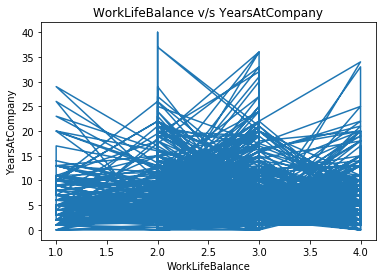

In [25]:
x=data['WorkLifeBalance']
y=data['YearsAtCompany']
plt.plot(x,y)
plt.title('WorkLifeBalance v/s YearsAtCompany')
plt.xlabel('WorkLifeBalance')
plt.ylabel('YearsAtCompany')
plt.show()

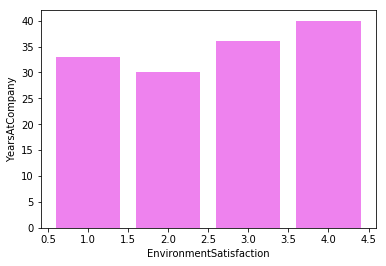

In [26]:
x=data['EnvironmentSatisfaction']
y=data['YearsAtCompany']
plt.bar(x,y,color='violet',linewidth=2)
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('YearsAtCompany')
plt.show()

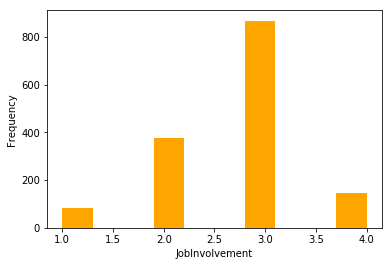

In [27]:
x=data['JobInvolvement']
plt.hist(x,color='orange')
plt.xlabel('JobInvolvement')
plt.ylabel('Frequency')
plt.show()

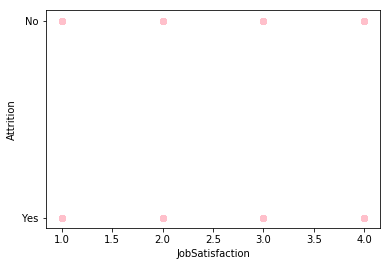

In [28]:
x=data['JobSatisfaction']
y=data['Attrition']
plt.scatter(x,y,color='pink')
plt.xlabel('JobSatisfaction')
plt.ylabel('Attrition')
plt.show()

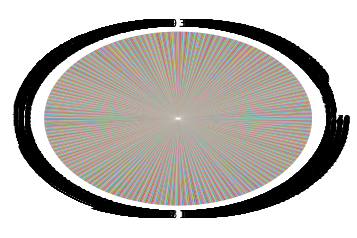

In [29]:
x=data['JobInvolvement']
plt.pie(x,labels=data['ID'])
plt.show()

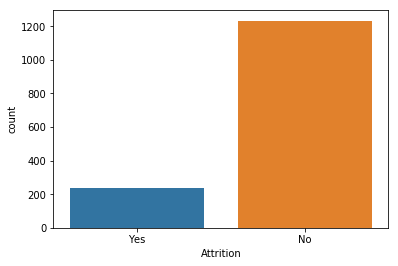

In [30]:
sns.countplot(data['Attrition'])
plt.show()

D:\apps\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


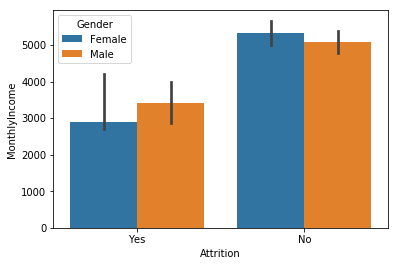

In [31]:
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'Gender',data=data, estimator=median)
plt.show()

D:\apps\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


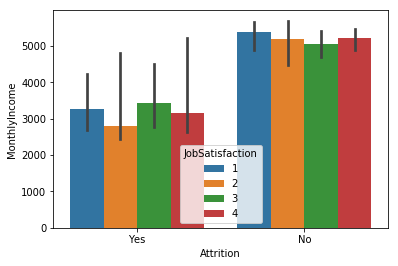

In [32]:
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'JobSatisfaction',data=data, estimator=median)
plt.show()

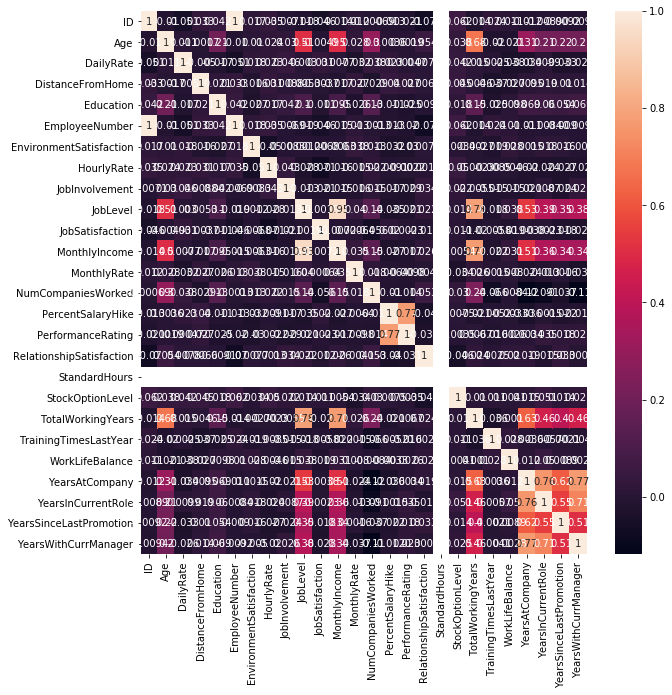

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [34]:
numerical_col=data.iloc[:,1:].select_dtypes(exclude='object').columns.values
numerical_col

array(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [35]:
le = LabelEncoder()
for i in data.iloc[:,1:].columns:
    if data[i].dtype == 'object':  
        data[i] = le.fit_transform(data[i])
data

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,2,1102,2,1,2,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,2,49,1,279,1,8,1,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,3,37,2,1373,1,2,2,4,4,4,...,80,0,7,3,3,0,0,0,0,1
3,4,33,1,1392,1,3,4,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,5,27,2,591,1,2,1,3,7,1,...,80,1,6,3,3,2,2,2,2,0
5,6,32,1,1005,1,2,2,1,8,4,...,80,0,8,2,2,7,7,3,6,0
6,7,59,2,1324,1,3,3,3,10,3,...,80,3,12,3,2,1,0,0,0,0
7,8,30,2,1358,1,24,1,1,11,4,...,80,1,1,2,3,1,0,0,0,0
8,9,38,1,216,1,23,3,1,12,4,...,80,0,10,2,3,9,7,1,8,0
9,10,36,2,1299,1,27,3,3,13,3,...,80,2,17,3,2,7,7,7,7,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
ID                          1470 non-null int64
Age                         1470 non-null int64
BusinessTravel              1470 non-null int32
DailyRate                   1470 non-null int64
Department                  1470 non-null int32
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int32
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int32
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int32
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int32
MonthlyIncome               1470 non-null int64
MonthlyRate                 1

In [37]:
x=data.drop('Attrition',axis=1)
y=data['Attrition']

In [38]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [39]:
y = le.fit_transform(y)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
from sklearn.preprocessing import StandardScaler as sc
scaler = sc()
x_train[numerical_col] = scaler.fit_transform(x_train[numerical_col])
x_test[numerical_col]=scaler.fit_transform(x_test[numerical_col])

D:\apps\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\apps\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\apps\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [42]:
lr =LogisticRegression()
model = lr.fit(x_train,y_train)

D:\apps\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [44]:
accuracy_score(y_predict,y_test)*100

86.39455782312925

In [45]:
DT=DecisionTreeClassifier()
dt=DT.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
dt_acc_score=accuracy_score(y_test,dt_pred)*100
(dt_acc_score)

78.91156462585033

In [46]:
RF=RandomForestClassifier()
rf=RF.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_acc_score=accuracy_score(y_test,rf_pred)*100
(rf_acc_score)

85.03401360544217